## Problem 1

### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# IMPORT DATA

In [2]:
data=pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [3]:
# To Understand the data
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
# Make a copy
dcopy=data.copy()
dcopy

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
dcopy.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Creating x and y dataset

In [8]:
x=dcopy.drop('Taxable.Income',axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [9]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


### Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
LB=LabelEncoder()

In [12]:
x["Undergrad"]=LB.fit_transform(x["Undergrad"])
x["Marital.Status"]=LB.fit_transform(x["Marital.Status"])
x["Urban"]=LB.fit_transform(x["Urban"])

In [13]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [14]:
y=dcopy[['Taxable.Income']]

In [15]:
y.head()

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002


In [16]:
y['tax']=['Risky' if x<=30000 else 'Good' for x in y["Taxable.Income"]]

In [17]:
y=y.drop(['Taxable.Income'],axis=1)
y

,tax
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [18]:
y.head(101)

,tax
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
96,Risky
97,Good
98,Risky
99,Good


## Spliting into Train and Test data set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [22]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

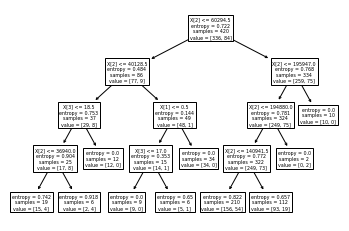

In [23]:
tree.plot_tree(model);

In [24]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [25]:
y.columns

Index(['tax'], dtype='object')

In [26]:
xn=["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]
yn=["Risky","Good"]

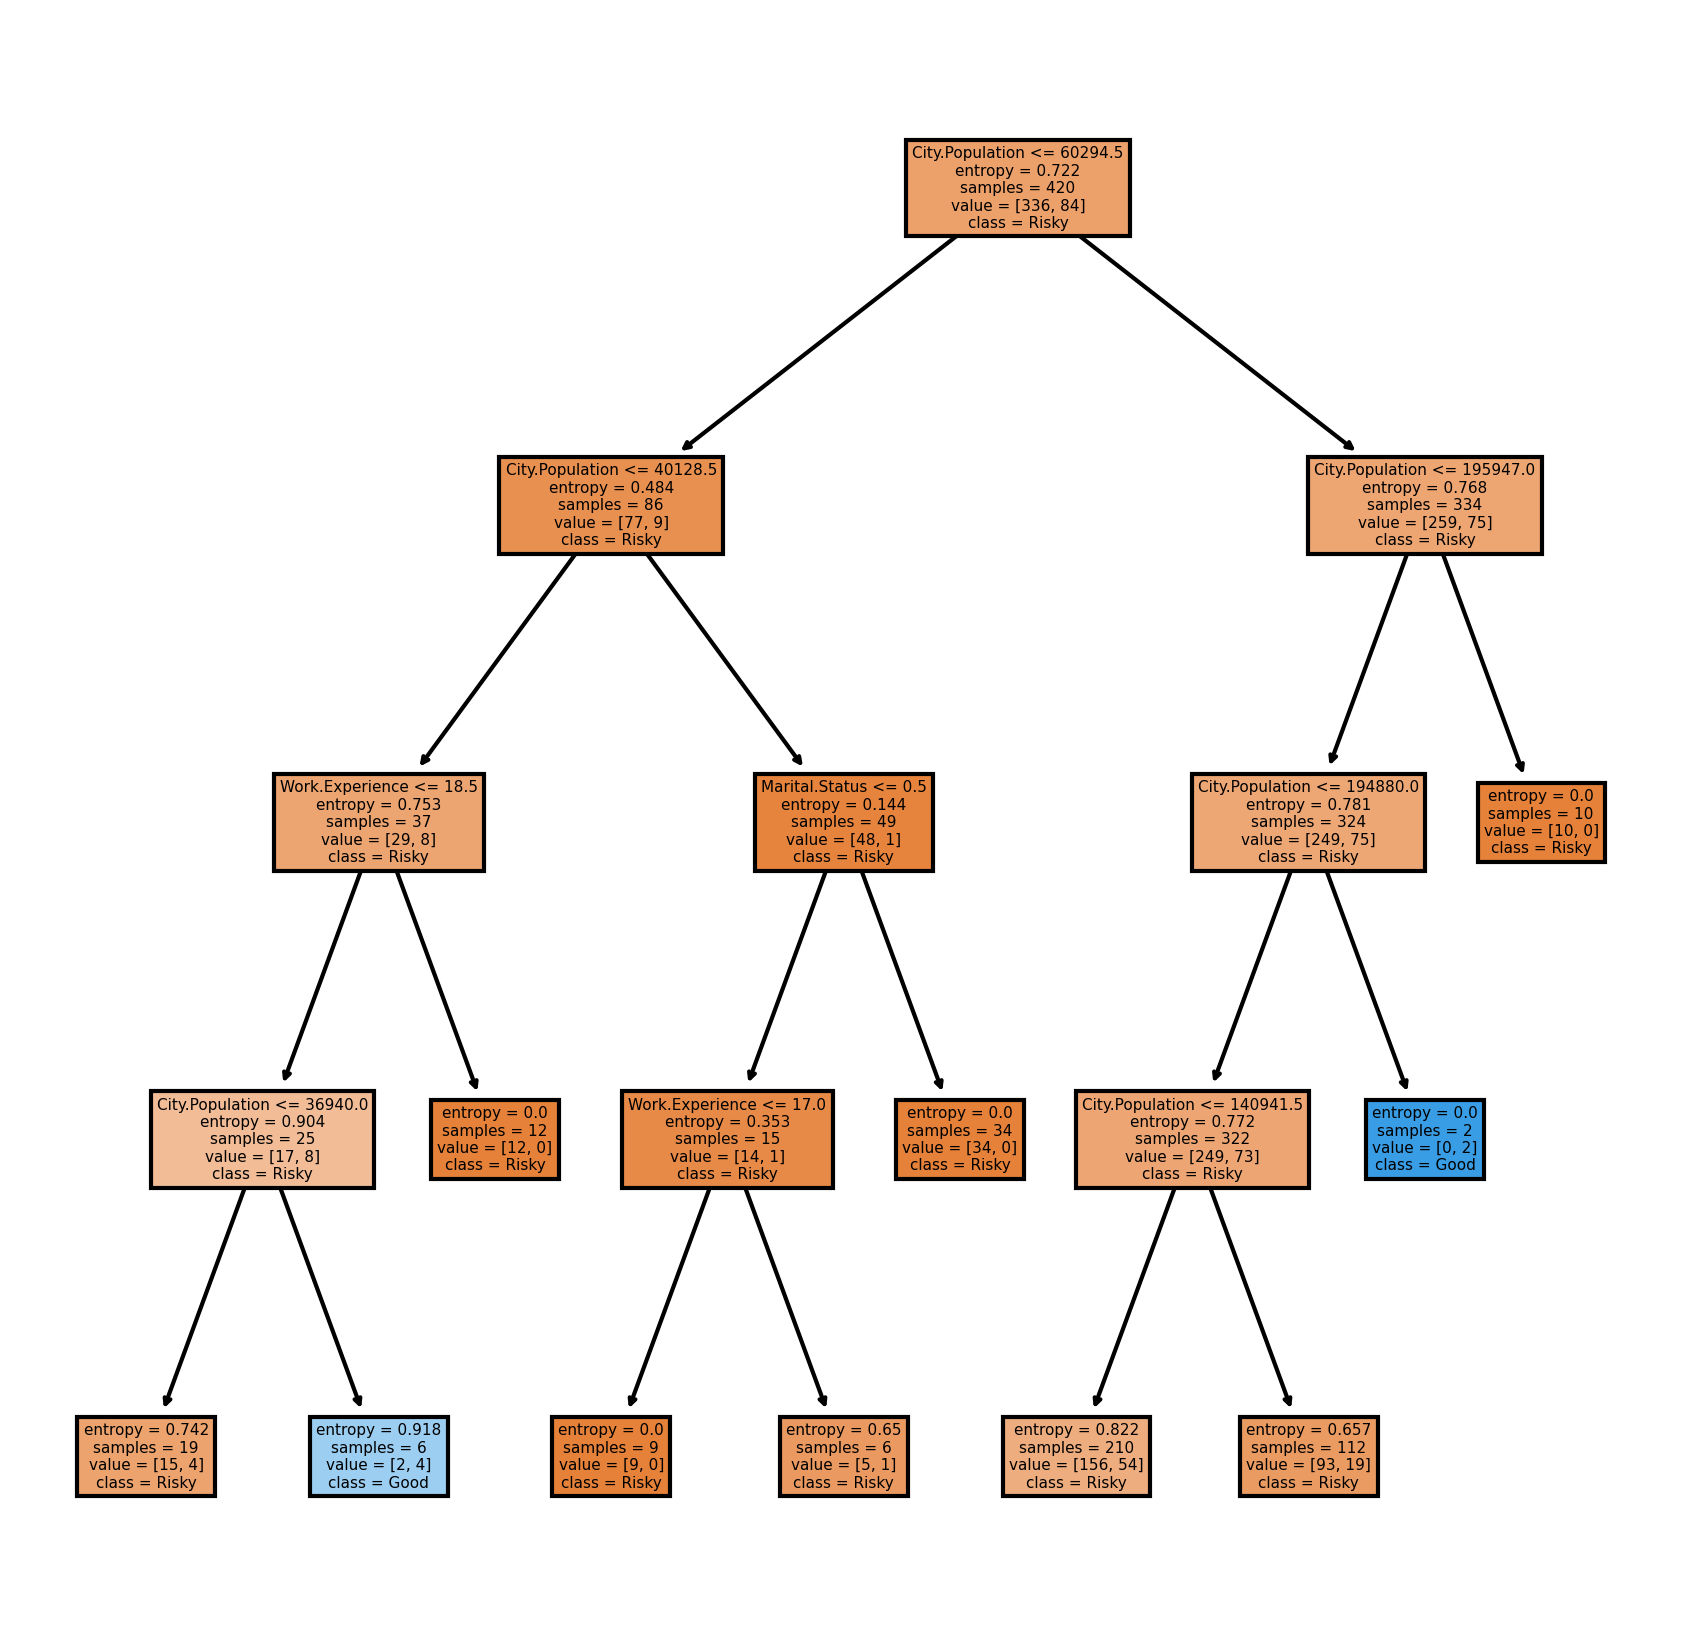

In [27]:
fig,axes=plt.subplots(nrows=1, ncols=1, figsize=(7,7), dpi=300)
tree.plot_tree(model, feature_names=xn, class_names=yn, filled=True);

## Prediction 

In [28]:
pred=model.predict(x_test)

In [29]:
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
    

In [30]:
pd.Series(pred).value_counts()

Good     177
Risky      3
dtype: int64

In [31]:
model.score(x_test,y_test)

0.7611111111111111

In [33]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [34]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n        Good       0.77      0.98      0.86       140\n       Risky       0.00      0.00      0.00        40\n\n    accuracy                           0.76       180\n   macro avg       0.39      0.49      0.43       180\nweighted avg       0.60      0.76      0.67       180\n'

Text(0.5, 1.0, 'Accuracy score:0.7611111111111111')

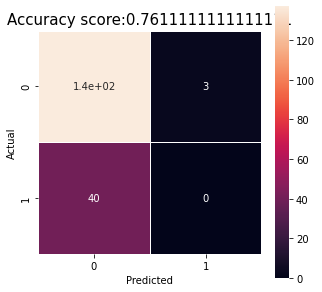

In [47]:
cm=confusion_matrix(y_test,pred)
cm
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, square= True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
sample="Accuracy score:{0}".format(model.score(x_test,y_test))
plt.title(sample,size=15)

In [49]:
# looping function to check the accuracy with max_depth ranging from 1 to 11
train_accuracy=[]
test_accuracy=[]
for i in range(1,11):
    model1=DecisionTreeClassifier(criterion="entropy",max_depth=i,random_state=40)
    model1.fit(x_train,y_train)
    train_accuracy.append(model1.score(x_train,y_train))
    test_accuracy.append(model1.score(x_test,y_test))

In [52]:
accuracy=pd.DataFrame({'Max_depth':range(1,11), "Train acc":train_accuracy, "Test acc":test_accuracy})
accuracy

,Max_depth,Train acc,Test acc
0,1,0.800000,0.777778
1,2,0.800000,0.777778
2,3,0.804762,0.772222
3,4,0.809524,0.761111
4,5,0.823810,0.766667
5,6,0.828571,0.766667
6,7,0.838095,0.766667
7,8,0.845238,0.766667
8,9,0.864286,0.733333
9,10,0.866667,0.750000


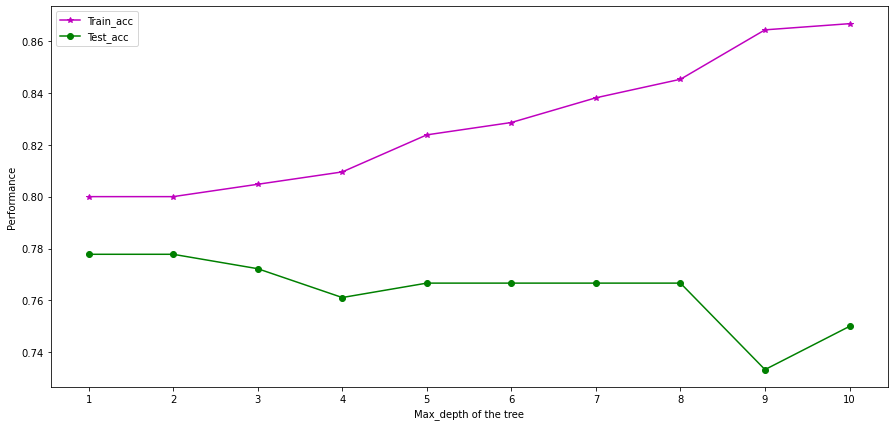

In [57]:
# visualization of accuracy using train and test data
labels=["Train_acc","Test_acc"]
fig=plt.figure(figsize=(15,7))
ax=fig.add_subplot()
plt.plot(accuracy["Max_depth"], accuracy["Train acc"], marker="*", color="m")
plt.plot(accuracy["Max_depth"], accuracy["Test acc"], marker="o", color="GREEN")
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel("Max_depth of the tree")
plt.ylabel("Performance")
plt.show()

# Inference

### From the range of 1 to 5 of maximum depth it shows the accuracy in between 78% to 80%

## ======================================================================================